In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

In [2]:
cust=pd.read_csv('C:/Users/hp/Desktop/python/Mall_Customers.csv')

In [3]:
cust.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
cust.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
cust.duplicated().sum()

0

In [6]:
cust.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
custm=cust.drop(['CustomerID'],axis=1)

In [8]:
custm.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
custm.Gender.replace(['Male','Female'],[0,1],inplace=True)

In [10]:
custm.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # library to compute K means clustering
from scipy.stats import zscore

In [12]:
x=StandardScaler()
cust_scaled=x.fit_transform(custm)

In [13]:
custm_scaled=zscore(custm)

In [14]:
custm_scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


In [15]:
# here we have define our KMeans() into a variable to further compute the scaled dataset
# n_clusters =2 stands for number of clusters we want to make from a dataset
# as in KMeans clustering we need to specify the number of clusters before working with model
k_means=KMeans(n_clusters=2)

In [16]:
# here we have fit our dataset into the variable created from the KMeans() in order to perform K_means clustering
k_means.fit(custm_scaled)

KMeans(n_clusters=2)

In [17]:
# there are several parameters stored in KMeans() such as labels, inertia, algorithm 
# Our interest are in two parameters i.e k_means.labels_ and k_means.interia_
# k_means.labels_ will provide an array with cluster number provided to each row/observation/record 
k_means.labels_

array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [18]:
# k_means.inertia_ will provide the wss value for the given number of clusters. 
# for example here we have specified n_clusters =2, so it will prvide within sum of squares(wss) for 2 clusters
k_means.inertia_

588.8026767824936

In [19]:
# belowe we have tried to calculate WSS for no. of cluster ranging from (1-10) in order to get the value of k or no. of cluster
wss=[]
for i in range(1,11):
    KM=KMeans(n_clusters=i)
    KM.fit(cust_scaled)
    wss.append(round(KM.inertia_,2))

In [20]:
wss

[800.0, 588.8, 476.79, 386.71, 325.68, 274.79, 235.68, 199.83, 174.15, 152.09]

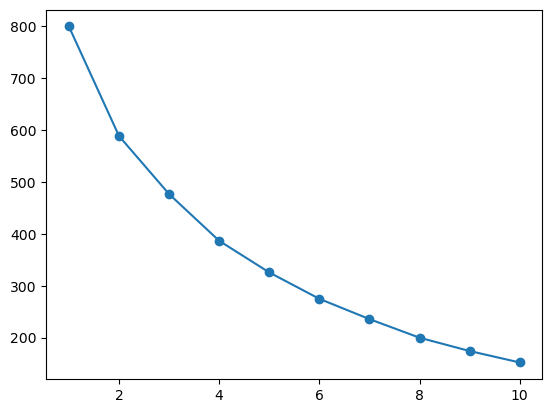

In [21]:
plt.plot(range(1,11),wss,marker='o')

In [22]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [23]:
ss={1:0}
for i in range(2,11):
    k_meanss=KMeans(n_clusters=i,init='k-means++',random_state=1)
    y=k_meanss.fit_predict(custm_scaled)
    s=silhouette_score(custm_scaled,y)
    ss[i]=round(s,5)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, s))

For n_clusters=2, the silhouette score is 0.25181529157884364
For n_clusters=3, the silhouette score is 0.25971470188178947
For n_clusters=4, the silhouette score is 0.30123231688013513
For n_clusters=5, the silhouette score is 0.31687290978861454
For n_clusters=6, the silhouette score is 0.3315610732950291
For n_clusters=7, the silhouette score is 0.3575533042931317
For n_clusters=8, the silhouette score is 0.3873969164416462
For n_clusters=9, the silhouette score is 0.4025192944683836
For n_clusters=10, the silhouette score is 0.4205229684185099


In [24]:
# from wss value and silhoute score we conclude that, we can divide the dataset into 3 Clusters
k_means_3=KMeans(n_clusters=3)
k_means_3.fit(custm_scaled)

KMeans(n_clusters=3)

In [29]:
labels=k_means_3.labels_
cust['Label']=labels

In [30]:
cust.Label.value_counts()

1    80
0    71
2    49
Name: Label, dtype: int64

In [33]:
test_file_ids=cust.CustomerID

In [34]:
submission=pd.DataFrame([test_file_ids,labels]).T
submission.rename(columns={'Unnamed 0':'Cluster_label'},inplace=True)
submission.to_csv('Cluster.csv',index=False)

In [37]:
cust.to_excel('Customer_clustered.xlsx',index=False)